<h1>Sklearn</h1>
<br>
O sklearn é uma das principais bibliotecas para aprendizagem de máquinas em Python. Os algorítmos mais populares possuem implementações nessa biblioteca, com excessão de técnicas que envolvam <i>Deep Learning</i>. Para tal, utilize bibliotecas como o <b>Tensorflow</b> ou <b>Pytorch</b>

In [62]:
# -*- coding: utf-8 -*-

<h2>Base de dados de teste</h2>
<br>
Para fins de teste, usaremos alguns conjuntos de dados teste que já estão disponíveis no sklearn. Inicialmente usaremos o iris dataset, que contém dados para a classificação de flores.
<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/1920px-Iris_versicolor_3.jpg" height="500" width="500">
<i>Fonte da imagem: Wikipedia: https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/1920px-Iris_versicolor_3.jpg</i>

In [83]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data
Y = iris.target

print('SHAPE X', np.shape(X))
print('SHAPE Y', np.shape(Y))

tag_set = set(Y)
print('TAG SET', tag_set)

SHAPE X (150, 4)
SHAPE Y (150,)
TAG SET {0, 1, 2}


<h2>Criando conjuntos de treinamento, teste e validação</h2>

In [84]:
from sklearn.model_selection import train_test_split

random_seed = 42

X_train_initial, X_test, Y_train_initial, Y_test = train_test_split(X, Y, 
                                                                    test_size=0.30, 
                                                                    stratify=Y,
                                                                    shuffle=True,
                                                                    random_state=random_seed)

print('SHAPE X_train_test', np.shape(X_train_initial))
print('SHAPE X_test', np.shape(X_test))
print('SET Y_train', set(Y_train_initial))
print('SET Y_test', set(Y_test))

X_train, X_validation, Y_train, Y_validation = train_test_split(X_train_initial, Y_train_initial, 
                                                                test_size=0.2, 
                                                                stratify=Y_train_initial,
                                                                shuffle=True,
                                                                random_state=random_seed)

print('SHAPE train', np.shape(X_train))
print('SHAPE validation', np.shape(X_validation))
print('SHAPE test', np.shape(X_test))

SHAPE X_train_test (105, 4)
SHAPE X_test (45, 4)
SET Y_train {0, 1, 2}
SET Y_test {0, 1, 2}
SHAPE train (84, 4)
SHAPE validation (21, 4)
SHAPE test (45, 4)


<h2>Testando classificadores no conjunto de validação e no conjunto de teste</h2>

In [87]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

model_1 = GaussianNB()
model_1.fit(X_train, Y_train)

model_2 = BernoulliNB()
model_2.fit(X_train, Y_train)

accuracy_validation_1 = model_1.score(X_validation, Y_validation)
accuracy_validation_2 = model_2.score(X_validation, Y_validation)

print('GaussianNB - acuracia no conjunto de validacao', accuracy_validation_1)
print('BernoulliNB - acuracia no conjunto de validacao', accuracy_validation_2)

#Para testar o segundo classificador
#accuracy_validation_2 = 1.0

if accuracy_validation_1 > accuracy_validation_2:
    accuracy_test = model_1.score(X_test, Y_test)
    print('GaussianNB - acuracia no conjunto de teste', accuracy_test)
else:
    accuracy_test = model_2.score(X_test, Y_test)
    print('BernoulliNB - acuracia no conjunto de teste', accuracy_test)

GaussianNB - acuracia no conjunto de validacao 1.0
BernoulliNB - acuracia no conjunto de validacao 0.3333333333333333
GaussianNB - acuracia no conjunto de teste 0.9111111111111111


In [88]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<h2>Construíndo uma curva ROC do classificador</h2>

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

model_regression = LogisticRegression()

model_regression.fit(X_train, Y_train)

Y_score = model_regression.predict_proba(X_test)

In [11]:
Y_score

array([[3.93341101e-04, 4.16700467e-01, 5.82906192e-01],
       [1.57775091e-02, 5.19727907e-01, 4.64494583e-01],
       [4.67108314e-03, 4.61634843e-01, 5.33694074e-01],
       [3.26237539e-02, 4.28866981e-01, 5.38509265e-01],
       [7.16591726e-03, 3.09660577e-01, 6.83173506e-01],
       [1.19062912e-03, 2.12897373e-01, 7.85911998e-01],
       [2.18462816e-02, 6.08237027e-01, 3.69916692e-01],
       [5.21782653e-02, 7.20720214e-01, 2.27101521e-01],
       [8.21995240e-01, 1.77788520e-01, 2.16239936e-04],
       [4.54581657e-03, 2.81632681e-01, 7.13821502e-01],
       [9.13423062e-01, 8.65493702e-02, 2.75681008e-05],
       [8.26826405e-01, 1.72542427e-01, 6.31168775e-04],
       [4.80575822e-04, 4.21536402e-01, 5.77983022e-01],
       [2.07180238e-03, 3.32541740e-01, 6.65386458e-01],
       [8.48247587e-01, 1.51589453e-01, 1.62960065e-04],
       [2.74162450e-03, 1.28561314e-01, 8.68697061e-01],
       [1.34179939e-01, 6.63678080e-01, 2.02141981e-01],
       [8.83485056e-01, 1.16398

In [90]:
class_to_look = 2
y_score_class = [x[class_to_look] for x in Y_score]

fpr, tpr, thresholds = roc_curve([int(y == class_to_look) for y in Y_test], y_score_class)

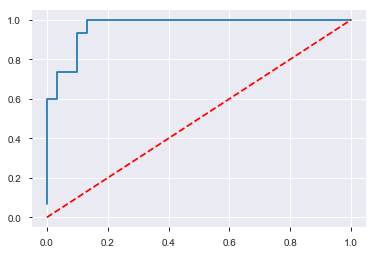

In [91]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr)
plt.plot(np.linspace(0.0, 1.0, 10), np.linspace(0.0, 1.0, 10), '--r')
plt.show(block=False)

<h2>Rodando o classificador em um conjunto de exemplos e salvando o modelo</h2>

In [92]:
#Realizando a previsao em um conjunto de dados

prediction = model_1.predict(X_test)
print('Prediction:', prediction[:10], 'vs Target:', Y_test[:10])

Prediction: [2 1 1 1 2 2 1 1 0 2] vs Target: [2 1 2 1 2 2 1 1 0 2]


In [93]:
#Salvando o modelo

#Existem duas formas diferentes

#Salvando....
import pickle
out = open('model_1.pickle', 'wb')
pickle.dump(model_1, out)
out.close()

#Carregando
model_saved = pickle.load(open('model_1.pickle', 'rb'))
prediction = model_saved.predict(X_test)
print('Prediction:', prediction[:10], 'vs Target:', Y_test[:10])

Prediction: [2 1 1 1 2 2 1 1 0 2] vs Target: [2 1 2 1 2 2 1 1 0 2]


In [94]:
#Segunda forma

from sklearn.externals import joblib

#Salvando
joblib.dump(model_1, 'model_1.pkl')

#Carregando
model_saved2 = joblib.load('model_1.pkl')
prediction = model_saved2.predict(X_test)
print('Prediction:', prediction[:10], 'vs Target:', Y_test[:10])

Prediction: [2 1 1 1 2 2 1 1 0 2] vs Target: [2 1 2 1 2 2 1 1 0 2]


<h2>Calculando as demais métricas dos classificadores</h2>

In [95]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

Y_pred_1 = model_1.predict(X_test)
Y_pred_2 = model_2.predict(X_test)

precision_1 = precision_score(Y_test, Y_pred_1, average=None)
precision_1_average = precision_score(Y_test, Y_pred_1, average='weighted')
print('Precisao do GaussianNB por classe', precision_1)
print('Precisao do GaussianNB na media', precision_1_average)

precision_2 = precision_score(Y_test, Y_pred_2, average=None)
precision_2_average = precision_score(Y_test, Y_pred_2, average='weighted')
print('Precisao do BernoulliNB por classe', precision_2)
print('Precisao do BernoulliNB na media', precision_2_average)

recall_1 = recall_score(Y_test, Y_pred_1, average=None)
recall_1_average = recall_score(Y_test, Y_pred_1, average='weighted')
print('Recall do GaussianNB por classe', recall_1)
print('Recall do GaussianNB na media', recall_1_average)

recall_2 = recall_score(Y_test, Y_pred_2, average=None)
recall_2_average = recall_score(Y_test, Y_pred_2, average='weighted')
print('Recall do BernoulliNB por classe', recall_2)
print('Recall do BernoulliNB na media', recall_2_average)

cm_1 = confusion_matrix(Y_test, Y_pred_1)
print('Matriz de confusao - GaussianNB\n', cm_1)

cm_2 = confusion_matrix(Y_test, Y_pred_2)
print('Matriz de confusao - BernoulliNB\n', cm_2)

Precisao do GaussianNB por classe [1.         0.82352941 0.92307692]
Precisao do GaussianNB na media 0.9155354449472096
Precisao do BernoulliNB por classe [0.33333333 0.         0.        ]
Precisao do BernoulliNB na media 0.1111111111111111
Recall do GaussianNB por classe [1.         0.93333333 0.8       ]
Recall do GaussianNB na media 0.9111111111111111
Recall do BernoulliNB por classe [1. 0. 0.]
Recall do BernoulliNB na media 0.3333333333333333
Matriz de confusao - GaussianNB
 [[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
Matriz de confusao - BernoulliNB
 [[15  0  0]
 [15  0  0]
 [15  0  0]]


/Users/fnba/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<h1>Atividade: Teste diversos classificadores utilizando o digits dataset</h1>
<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" height="500" width="500">
<i>Fonte da imagem: Wikipedia: https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png</i>
<br>
<h4>Pesquisar classificadores aqui:</h4>
<a href="https://scikit-learn.org/stable/supervised_learning.html" target="_blank">Referência do sklearn</a>
    

In [199]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

digits = datasets.load_digits()
X = digits.data
Y = digits.target

print('SHAPE X', np.shape(X))
print('SHAPE Y', np.shape(Y))

tag_set = set(Y)
print('TAG SET', tag_set)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                                    test_size=0.30, 
                                                                    stratify=Y,
                                                                    shuffle=True,
                                                                    random_state=random_seed)
model = LogisticRegression()
model_svm = SVC(kernel='linear')
model_mlp = MLPClassifier((10, 10), activation='logistic', random_state=random_seed)
model_knn = KNeighborsClassifier()

model.fit(X_train, Y_train)
model_svm.fit(X_train, Y_train)
model_mlp.fit(X_train, Y_train)
model_knn.fit(X_train, Y_train)

print('Accuracy', model.score(X_test, Y_test))
print('Accuracy 2', model_svm.score(X_test, Y_test))
print('Accuracy 3', model_mlp.score(X_test, Y_test))
print('Accuracy 4', model_knn.score(X_test, Y_test))

SHAPE X (1797, 64)
SHAPE Y (1797,)
TAG SET {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Accuracy 0.9574074074074074
Accuracy 2 0.975925925925926
Accuracy 3 0.8666666666666667
Accuracy 4 0.987037037037037


/Users/fnba/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [200]:
model.coef_

array([[ 0.00000000e+00, -6.33893528e-02, -9.67942315e-02,
         5.52112973e-02, -6.96388645e-02, -2.62379301e-01,
        -1.66557113e-01, -1.59733366e-02, -2.10193179e-05,
        -2.03582812e-01,  4.82657197e-02,  1.21537226e-01,
         1.91390414e-01,  2.37275095e-01, -4.03292925e-03,
        -1.58948708e-02, -7.18095995e-06,  6.72691926e-02,
         1.19500144e-01, -1.32938256e-01, -3.13532437e-01,
         1.87369350e-01,  5.77360749e-02, -5.95008668e-03,
        -1.26494904e-06,  1.07692361e-01, -7.90143572e-02,
        -5.13003917e-02, -6.14967398e-01,  6.33682891e-02,
         5.89887847e-02, -9.32293823e-04,  0.00000000e+00,
         2.26977757e-01,  4.59485319e-03, -1.19155257e-01,
        -5.60563228e-01, -1.33265712e-02, -7.87408142e-02,
         0.00000000e+00, -2.85558452e-03,  2.61732200e-02,
         2.63450546e-01, -1.68921061e-01, -4.20323438e-01,
         1.92750446e-02,  4.24552227e-02, -1.16880414e-04,
        -7.39876830e-03, -1.21661397e-01,  9.40640114e-0

<h2>Normalização de features - Max Min</h2>

In [98]:
from sklearn import datasets
import numpy as np

wine = datasets.load_wine()
X = wine.data
Y = wine.target

print('SHAPE X', np.shape(X))
print('SHAPE Y', np.shape(Y))

tag_set = set(Y)
print('TAG SET', tag_set)

SHAPE X (178, 13)
SHAPE Y (178,)
TAG SET {0, 1, 2}


In [77]:
import pandas as pd
import pandas_profiling

X_df = pd.DataFrame(X, columns=wine.feature_names)
pandas_profiling.ProfileReport(X_df)

Number of variables,13
Number of observations,178
Total Missing (%),0.0%
Total size in memory,18.2 KiB
Average record size in memory,104.4 B
Numeric,13
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [78]:
from sklearn.model_selection import train_test_split


X_train_wine, X_test_wine, Y_train_wine, Y_test_wine = train_test_split(X, Y, 
                                                                    test_size=0.30, 
                                                                    stratify=Y,
                                                                    shuffle=True)

In [99]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_wine_sc = scaler.fit_transform(X_train_wine)
X_test_wine_sc = scaler.transform(X_test_wine)

pd_train = pd.DataFrame(X_train_wine_sc, columns=wine.feature_names)
pd_test = pd.DataFrame(X_test_wine_sc, columns=wine.feature_names)

In [26]:
pandas_profiling.ProfileReport(pd_train)

Number of variables,13
Number of observations,124
Total Missing (%),0.0%
Total size in memory,12.7 KiB
Average record size in memory,104.6 B
Numeric,13
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [100]:
pandas_profiling.ProfileReport(pd_test)

Number of variables,13
Number of observations,54
Total Missing (%),0.0%
Total size in memory,5.6 KiB
Average record size in memory,105.5 B
Numeric,12
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,1


<h2>Normalização de features - Z normalization</h2>

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_wine_sc = scaler.fit_transform(X_train_wine)
X_test_wine_sc = scaler.transform(X_test_wine)

pd_train = pd.DataFrame(X_train_wine_sc, columns=wine.feature_names)
pd_test = pd.DataFrame(X_test_wine_sc, columns=wine.feature_names)

In [29]:
pandas_profiling.ProfileReport(pd_train)

Number of variables,13
Number of observations,124
Total Missing (%),0.0%
Total size in memory,12.7 KiB
Average record size in memory,104.6 B
Numeric,13
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [81]:
pandas_profiling.ProfileReport(pd_test)

Number of variables,13
Number of observations,54
Total Missing (%),0.0%
Total size in memory,5.6 KiB
Average record size in memory,105.5 B
Numeric,12
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,1


<h2>Exemplo de cross validation</h2>

In [216]:
from sklearn.model_selection import KFold

digits = datasets.load_digits()
X = digits.data
Y = digits.target

kf = KFold(n_splits=10)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    model = GaussianNB()
    model.fit(X_train, Y_train)
    print('Acuracia atual', model.score(X_test, Y_test))

Acuracia atual 0.7722222222222223
Acuracia atual 0.8166666666666667
Acuracia atual 0.8833333333333333
Acuracia atual 0.7166666666666667
Acuracia atual 0.7166666666666667
Acuracia atual 0.8611111111111112
Acuracia atual 0.8444444444444444
Acuracia atual 0.88268156424581
Acuracia atual 0.8212290502793296
Acuracia atual 0.8156424581005587


<h2>Curvas de aprendizado</h2>

In [217]:
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB

digits = datasets.load_digits()
X = digits.data
Y = digits.target

train_sizes, train_scores, valid_scores = learning_curve(GaussianNB(), X, Y, train_sizes=[x for x in range(10, 300)], cv=5)


In [218]:
np.shape(train_scores)

(290, 5)

In [220]:
train_scores[:, 0]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.98507463, 0.98529412, 0.98550725,
       0.98571429, 0.98591549, 0.98611111, 0.98630137, 0.98648649,
       0.98666667, 0.98684211, 0.98701299, 0.98717949, 0.97468354,
       0.975     , 0.97530864, 0.97560976, 0.96385542, 0.96428

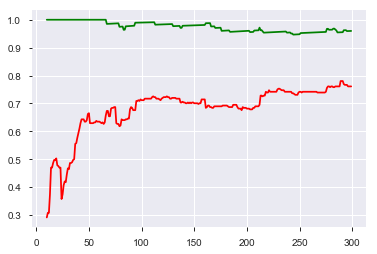

In [223]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure()
plt.plot(train_sizes, train_scores[:, 0], '-g')
plt.plot(train_sizes, valid_scores[:, 0], '-r')
plt.show(block=False)

<h2>Combinação de classificadores</h2>

In [224]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

digits = datasets.load_digits()
X = digits.data
Y = digits.target

print('SHAPE X', np.shape(X))
print('SHAPE Y', np.shape(Y))

tag_set = set(Y)
print('TAG SET', tag_set)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.30, 
                                                    stratify=Y,
                                                    shuffle=True)


cl1 = GaussianNB()
cl2 = LogisticRegression()
cl3 = KNeighborsClassifier()

combined_cl = VotingClassifier(estimators=[('cl1', cl1), ('cl2', cl2), ('cl3', cl3)])
                 
combined_cl.fit(X_train, Y_train)
                               
prediction = combined_cl.predict(X_test)

cm = confusion_matrix(Y_test, prediction)
print('Matriz de confusao', cm)

SHAPE X (1797, 64)
SHAPE Y (1797,)
TAG SET {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Matriz de confusao [[53  0  0  0  1  0  0  0  0  0]
 [ 0 50  0  0  0  1  0  0  2  2]
 [ 0  1 52  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  2  0  1  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0  1  1 52  0  0  0  1]
 [ 0  0  0  0  0  0 54  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  6  0  1  0  0  0  0 45  0]
 [ 0  3  0  0  1  2  0  0  0 48]]


/Users/fnba/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<h2>Aprendizado no espaço de saídas</h2>

In [240]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

digits = datasets.load_digits()
X = digits.data
Y = digits.target

X_train_initial, X_test, Y_train_initial, Y_test = train_test_split(X, Y,
                                                    test_size=0.30, 
                                                    stratify=Y,
                                                    shuffle=True)

X_train, X_validation, Y_train, Y_validation = train_test_split(X_train_initial, Y_train_initial, 
                                                                test_size=0.2, 
                                                                stratify=Y_train_initial,
                                                                shuffle=True,
                                                                random_state=random_seed)

classif1 = GaussianNB()
classif2 = BernoulliNB()

classif1.fit(X_train, Y_train)
classif2.fit(X_train, Y_train)

pred_1 = classif1.predict(X_validation)
pred_2 = classif2.predict(X_validation)



In [244]:
pred = classif1.predict(X_test)
confusion_matrix(Y_test, pred)

array([[52,  1,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  2,  3,  0],
       [ 0,  5, 36,  0,  0,  0,  0,  0, 12,  0],
       [ 0,  0,  0, 45,  0,  2,  0,  3,  5,  0],
       [ 0,  3,  0,  0, 45,  0,  1,  4,  1,  0],
       [ 0,  0,  0,  0,  0, 52,  1,  1,  1,  0],
       [ 0,  2,  0,  0,  1,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1,  0, 52,  0,  0],
       [ 0,  4,  0,  1,  0,  2,  0,  3, 42,  0],
       [ 0,  4,  0,  1,  2,  1,  0,  4,  7, 35]])

In [245]:
pred_1

array([1, 7, 3, 7, 7, 3, 4, 1, 8, 1, 8, 7, 4, 5, 8, 9, 6, 4, 5, 7, 8, 1,
       7, 6, 2, 2, 4, 7, 3, 7, 0, 6, 3, 5, 1, 6, 5, 3, 3, 7, 8, 0, 2, 5,
       3, 1, 3, 2, 0, 3, 2, 0, 2, 0, 1, 1, 6, 7, 8, 4, 3, 9, 6, 5, 7, 3,
       4, 1, 3, 1, 5, 1, 9, 4, 7, 9, 1, 5, 8, 0, 7, 6, 9, 5, 2, 2, 7, 8,
       4, 6, 7, 5, 7, 2, 1, 9, 0, 1, 2, 9, 1, 6, 4, 9, 8, 0, 8, 7, 1, 6,
       2, 8, 5, 4, 6, 4, 4, 8, 0, 6, 5, 4, 6, 3, 5, 5, 0, 0, 0, 5, 9, 4,
       8, 9, 6, 7, 6, 8, 6, 4, 1, 3, 7, 8, 7, 6, 7, 3, 0, 2, 8, 1, 7, 7,
       0, 8, 8, 0, 5, 8, 8, 0, 2, 7, 4, 5, 1, 5, 8, 3, 1, 4, 7, 8, 7, 3,
       8, 8, 1, 0, 6, 7, 9, 9, 1, 2, 1, 3, 0, 1, 1, 0, 5, 7, 3, 3, 5, 0,
       6, 7, 6, 5, 1, 6, 9, 5, 1, 6, 4, 9, 6, 2, 7, 5, 6, 5, 5, 3, 7, 6,
       8, 3, 0, 9, 1, 2, 1, 8, 6, 1, 8, 5, 1, 6, 4, 7, 4, 8, 0, 0, 0, 1,
       1, 8, 1, 0, 4, 5, 7, 5, 4, 6])

In [307]:
pred_1_df = pd.DataFrame(pred_1, columns=['classif'])
pred_2_df = pd.DataFrame(pred_2, columns=['classif'])

pred_1_df = pd.get_dummies(pred_1_df, columns=['classif'], prefix='classif')
column_names = pred_1_df.columns
pred_2_df = pd.get_dummies(pred_2_df, columns=['classif'], prefix='classif')
pred_2_df = pred_2_df[columns_1]

In [308]:
pred_1_df.head()

,classif_0,classif_1,classif_2,classif_3,classif_4,classif_5,classif_6,classif_7,classif_8,classif_9
0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [309]:
final_X_validation = np.hstack([X_validation, pred_1_df.values, pred_2_df.values])

In [310]:
print('Shape original', np.shape(X_validation))
print('Novo shape', np.shape(final_X_validation))

Shape original (252, 64)
Novo shape (252, 84)


In [312]:
final_classif = GaussianNB()
final_classif.fit(final_X_validation, Y_validation)

GaussianNB(priors=None)

In [313]:
def make_prediction(X, classif1, classif2, final_classif):
    pred_1 = classif1.predict(X)
    pred_2 = classif2.predict(X)
    pred_1_df = pd.DataFrame(pred_1, columns=['classif'])
    pred_2_df = pd.DataFrame(pred_2, columns=['classif'])
    pred_1_df = pd.get_dummies(pred_1_df, columns=['classif'], prefix='classif')
    pred_2_df = pd.get_dummies(pred_2_df, columns=['classif'], prefix='classif')
    pred_1_df = pred_1_df[column_names]
    pred_2_df = pred_2_df[column_names]
    final_X = np.hstack([X, pred_1_df.values, pred_2_df.values])
    return final_classif.predict(final_X)

just_one_prediction = classif1.predict(X_test)
prediction = make_prediction(X_test, classif1, classif2, final_classif)

In [314]:
cm_just_one = confusion_matrix(Y_test, just_one_prediction)
cm_combined = confusion_matrix(Y_test, prediction)
print('Matriz de confusao (apenas um)', cm_just_one)
print('...............')
print('Matriz de confusao combinada', cm_combined)

print('Average precision (apenas um)', precision_score(Y_test, just_one_prediction, average='weighted'))
print('Average precision (combinada)', precision_score(Y_test, prediction, average='weighted'))

Matriz de confusao (apenas um) [[54  0  0  0  0  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  2  0]
 [ 0  8 34  1  0  0  0  0 10  0]
 [ 0  0  1 45  0  2  0  1  6  0]
 [ 1  2  0  0 41  0  2  8  0  0]
 [ 0  1  0  0  0 51  1  1  1  0]
 [ 0  1  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  2  0 52  0  0]
 [ 0  4  0  0  0  0  0  2 46  0]
 [ 0  6  0  2  1  1  0  6  4 34]]
...............
Matriz de confusao combinada [[ 0  0  0  1 15 10  0  4 14 10]
 [ 0 38  7  0  1  3  0  1  2  3]
 [ 0  1 46  2  0  0  1  0  3  0]
 [ 0  0  2 48  0  2  0  2  1  0]
 [ 0  1  0  0 50  0  0  3  0  0]
 [ 0  0  0  0  0 52  0  1  1  1]
 [ 0  0  0  0  1  2 51  0  0  0]
 [ 0  0  1  1  0  3  0 47  2  0]
 [ 0  4  3  1  1  0  0  3 40  0]
 [ 0  4  0  3  0  1  0  1  7 38]]
Average precision (apenas um) 0.884490239698573
Average precision (combinada) 0.6925247569645948


/Users/fnba/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<h2>Exemplo de adaboost</h2>

In [315]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

digits = datasets.load_digits()
X = digits.data
Y = digits.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.30, 
                                                    stratify=Y,
                                                    shuffle=True)


In [316]:
ada_classifier = AdaBoostClassifier(base_estimator=GaussianNB(), n_estimators=100)

ada_classifier.fit(X_train, Y_train)

pred_ada = ada_classifier.predict(X_test)

ada_cm = confusion_matrix(Y_test, pred_ada)
print('Confusion matrix (adaboost)', ada_cm)

Confusion matrix (adaboost) [[50  0  0  0  3  0  0  1  0  0]
 [ 0 41  6  0  0  0  0  0  4  4]
 [ 0  0 50  0  0  0  0  0  2  1]
 [ 0  0  1 47  0  4  0  0  0  3]
 [ 1  1  1  0 44  0  0  4  2  1]
 [ 0  0  1  0  0 46  0  1  2  5]
 [ 0  0  1  2  0  1 49  0  1  0]
 [ 0  0  0  0  2  0  0 51  0  1]
 [ 0  0  2  1  1  1  0  1 46  0]
 [ 0  0  0  5  0  1  0  1  3 44]]


<h2>Exemplo de bagging</h2>

In [256]:
from sklearn.ensemble import BaggingClassifier

bag_classifier = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=10)

bag_classifier.fit(X_train, Y_train)

pred_bag = bag_classifier.predict(X_test)

bag_cm = confusion_matrix(Y_test, pred_bag)
print('Confusion matrix (adaboost)', bag_cm)

Confusion matrix (adaboost) [[53  0  0  0  0  1  0  0  0  0]
 [ 0 49  0  0  0  0  0  1  5  0]
 [ 0  5 37  0  1  0  0  0 10  0]
 [ 0  0  0 36  0  3  0  3 11  2]
 [ 0  1  0  0 48  1  1  3  0  0]
 [ 0  2  0  0  0 49  1  1  2  0]
 [ 0  1  1  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  1  0 53  0  0]
 [ 0  8  0  0  0  1  0  0 43  0]
 [ 0  6  1  0  2  1  0  3  9 32]]


<h2>Facilidades para a codificação - DictVectorizer</h2>

In [257]:
#Vamos supor o seguinte conjunto de features

x = pd.DataFrame([[1,29,'cachorro'], [2, 45, 'gato'], [3, 70, 'hamster']], columns=['numero_filhos', 
                                                                                    'idade', 'animal_estimacao'])
x

,numero_filhos,idade,animal_estimacao
0,1,29,cachorro
1,2,45,gato
2,3,70,hamster


In [317]:
#Podemos transformar todas essas features em valores numericos de forma bastante simples

x_dict = x.T.to_dict().values()
x_dict

dict_values([{'numero_filhos': 1, 'idade': 29, 'animal_estimacao': 'cachorro'}, {'numero_filhos': 2, 'idade': 45, 'animal_estimacao': 'gato'}, {'numero_filhos': 3, 'idade': 70, 'animal_estimacao': 'hamster'}])

In [266]:
from sklearn.feature_extraction import DictVectorizer

vectorizer = DictVectorizer()
new_x = vectorizer.fit_transform(x_dict)
new_x.todense()

matrix([[ 1.,  0.,  0., 29.,  1.],
        [ 0.,  1.,  0., 45.,  2.],
        [ 0.,  0.,  1., 70.,  3.]])

In [268]:
k = vectorizer.transform([{'animal_estimacao': 'cachorro', 'idade': 45, 'numero_filhos': 1}])
k.todense()

matrix([[ 1.,  0.,  0., 45.,  1.]])

In [267]:
k = vectorizer.transform([{'animal_estimacao': 'coelho', 'idade': 45, 'numero_filhos': 1}])
k.todense()

matrix([[ 0.,  0.,  0., 45.,  1.]])

<h2>Escalabilidade no treinamento - minibatches</h2>

In [280]:
#Operador yield

def create_squares_1(my_list):
    squared_list = []
    for elem in my_list:
        squared_list.append(elem ** 2)
    return squared_list

squared_list = create_squares_1([1,2,3,4])

for elem in squared_list:
    print(elem)

1
4
9
16


In [281]:
#Alternativa

def create_squares_1(my_list):
    squared_list = []
    for elem in my_list:
        yield elem ** 2

squared_list_gen = create_squares_1([1,2,3,4])

for elem in squared_list:
    print(elem)

1
4
9
16


<h3>Exemplo de treinamento em minibatch com o digits dataset</h3>


In [282]:
#Carregando o digits dataset
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import numpy as np
import math

iris = datasets.load_digits()
X = iris.data
Y = iris.target

X_train_initial, X_test, Y_train_initial, Y_test = train_test_split(X, Y, 
                                                                    test_size=0.30, 
                                                                    stratify=Y,
                                                                    shuffle=True)

X_train, X_validation, Y_train, Y_validation = train_test_split(X_train_initial, Y_train_initial, 
                                                                test_size=0.2, 
                                                                stratify=Y_train_initial,
                                                                shuffle=True)


In [283]:
np.shape(X_train)

(1005, 64)

In [287]:
#Rodar mais de uma vez

def create_batches(X_set, Y_set, size_batch):
    len_X = np.shape(X_set)[0]
    num_batches = int(math.floor(len_X/size_batch))
    start = 0
    for i in range(num_batches):
        x_batch = X_set[start:start + size_batch]
        y_batch = Y_set[start:start + size_batch]
        start += size_batch
        yield x_batch, y_batch

model = SGDClassifier(loss='hinge')
num_epochs = 3

my_classes = (0,1,2,3,4,5,6,7,8,9)

for epoch in range(num_epochs):
    print('Epoch', epoch, 'of', num_epochs)
    batch_generator = create_batches(X_train, Y_train, 30)
    
    for batch_x, batch_y in batch_generator:
        model.partial_fit(batch_x, batch_y, classes=my_classes)

accuracy_validation = model.score(X_validation, Y_validation)

print('Accuracy', accuracy_validation)

Epoch 0 of 3
Epoch 1 of 3
Epoch 2 of 3
Accuracy 0.9523809523809523


/Users/fnba/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


<h2>Exemplo - bases de dados desbalanceadas</h2>

In [290]:
#Criando uma base de dados desbalanceada artificialmente

iris = datasets.load_digits()
X = iris.data
Y = iris.target

Y = [int(y==3) for y in Y]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.30, 
                                                    stratify=Y,
                                                    shuffle=True)
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

prediction = classifier.predict(X_test)

cm = confusion_matrix(Y_test, prediction)
print('Matriz de confusao', cm)

Matriz de confusao [[280 205]
 [  1  54]]


In [288]:
50/(50 + 135)

0.2702702702702703

In [291]:
#Exemplo - undersampling + combining
X_1 = [x for i, x in enumerate(X_train) if Y_train[i] == 1]
X_0 = [x for i, x in enumerate(X_train) if Y_train[i] == 0]

print('Len X_1', len(X_1))
print('Len X_0', len(X_0))
print('Unbalancing factor', len(X_0)/len(X_1))

Len X_1 128
Len X_0 1129
Unbalancing factor 8.8203125


In [292]:
[1]*3

[1, 1, 1]

In [293]:
import random

random.shuffle(X_0)

def generate_training_sets(X_0, X_1):
    len_x0 = len(X_0)
    num_per_ts = int(len_x0/8)
    
    Xs = []
    Ys = []
    
    for i in range(8):
        current_X0 = X_0[i*num_per_ts:(i+1)*num_per_ts]
        current_X = current_X0 + X_1
        current_Y = [0]*len(current_X0) + [1]*len(X_1)
        
        Xs.append(current_X)
        Ys.append(current_Y)
    return Xs, Ys

In [294]:
all_Xs, all_Ys = generate_training_sets(X_0, X_1)

In [295]:
from tqdm import tqdm

classifiers = []

for i, xt in tqdm(enumerate(all_Xs)):
    new_classifier = LogisticRegression()
    new_classifier.fit(xt, all_Ys[i])
    classifiers.append(new_classifier)


8it [00:00, 348.13it/s]


In [296]:
import numpy as np

def make_predictions(X, classifiers):
    predictions = []
    for classif in classifiers:
        new_prediction = classif.predict(X)
        predictions.append(new_prediction)
    stack_predictions = np.vstack(predictions)
    stack_mean = np.mean(stack_predictions, axis=0)
    return [int(sm > 0.5) for sm in stack_mean]

pred = make_predictions(X_test, classifiers)

cm = confusion_matrix(Y_test, pred)

print('Matriz de confusao', cm)

Matriz de confusao [[476   9]
 [  2  53]]


In [297]:
53.0/(53.0 + 9.0)

0.8548387096774194

<h2>Exemplo de clustering</h2>

In [175]:
#Gerando um dataset artifical

blob1 = 2.0*np.random.randn(100, 2)
blob1 += np.array([1,2])

blob2 = 3.0*np.random.randn(100, 2)
blob2 += np.array([10,15])

blob3 = 3.0*np.random.randn(100, 2)
blob3 += np.array([20, 30])

final_data = np.vstack([blob1, blob2, blob3])

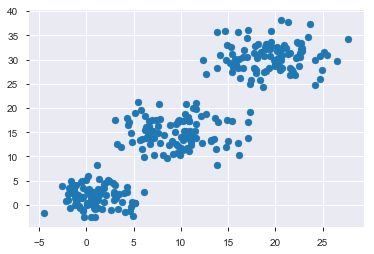

In [298]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure()
plt.scatter([x for x, y in final_data], [y for x, y in final_data])
plt.show(block=False)

In [183]:
from sklearn.cluster import KMeans

clustering = KMeans(3).fit(final_data)
L = clustering.labels_
C = clustering.cluster_centers_

L

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

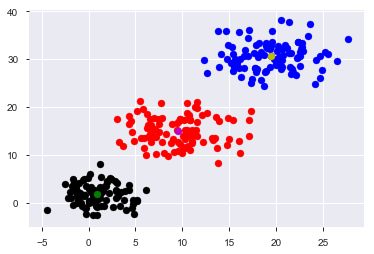

In [299]:
%matplotlib inline

data_0 = [x for i, x in enumerate(final_data) if L[i] == 0]
data_1 = [x for i, x in enumerate(final_data) if L[i] == 1]
data_2 = [x for i, x in enumerate(final_data) if L[i] == 2]

import matplotlib.pyplot as plt
plt.figure()
plt.scatter([x for x, y in data_0], [y for x, y in data_0], c='b')
plt.scatter([x for x, y in data_1], [y for x, y in data_1], c='r')
plt.scatter([x for x, y in data_2], [y for x, y in data_2], c='k')

plt.scatter([C[0][0]], [C[0][1]], c='y')
plt.scatter([C[1][0]], [C[1][1]], c='m')
plt.scatter([C[2][0]], [C[2][1]], c='g')
plt.show(block=False)

<h2>Exemplo de PCA</h2>

In [301]:
from sklearn import decomposition

digits = datasets.load_digits()
X = digits.data
Y = digits.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.30, 
                                                    stratify=Y,
                                                    shuffle=True)

pca = decomposition.PCA(n_components=10)
pca.fit(X_train)
X_train_2 = pca.transform(X_train)
X_test_2 = pca.transform(X_test)

print('Shape original', np.shape(X_train))
print('Novo shape', np.shape(X_train_2))

classifier1 = GaussianNB()
classifier1.fit(X_train, Y_train)

classifier2 = GaussianNB()
classifier2.fit(X_train_2, Y_train)

prediction_1 = classifier1.predict(X_test)
prediction_2 = classifier2.predict(X_test_2)

cm_1 = confusion_matrix(Y_test, prediction_1)
cm_2 = confusion_matrix(Y_test, prediction_2)

print('Matriz de confusao original', cm_1)
print('...........')
print('Matriz de confusao com PCA', cm_2)

Shape original (1257, 64)
Novo shape (1257, 10)
Matriz de confusao original [[53  0  0  0  1  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  1  4  3]
 [ 0  4 43  0  0  0  0  0  6  0]
 [ 0  0  2 46  0  2  0  1  3  1]
 [ 1  0  0  0 42  0  3  8  0  0]
 [ 0  0  0  1  0 49  2  2  1  0]
 [ 0  1  1  0  0  0 52  0  0  0]
 [ 0  0  1  0  1  1  0 51  0  0]
 [ 0  0  2  0  0  0  0  2 48  0]
 [ 0  6  1  1  1  0  0  7  4 34]]
...........
Matriz de confusao com PCA [[53  0  0  0  0  1  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  4  1]
 [ 0  6 46  0  0  0  0  0  1  0]
 [ 0  0  3 46  0  1  0  1  0  4]
 [ 0  0  0  0 51  0  0  3  0  0]
 [ 0  0  0  0  0 51  0  0  0  4]
 [ 0  1  0  0  0  0 52  0  1  0]
 [ 0  0  0  0  1  0  0 53  0  0]
 [ 0  2  3  2  0  0  0  0 45  0]
 [ 0  2  0  2  0  1  0  4  0 45]]
